In [1]:
#==============================================================================
# # Run the SMART pipeline between conditions (within subject)
#==============================================================================

#==============================================================================
# Assumes that the data is in a pickle file and structured identical to 
# 'ExampleDataSMART.p'.
# 
# A pandas dataframe with:
#       Each participant in its own row 
#       Time var1 in 1 column, all the data in 1 cell
#       Dep. var1 in 1 column, all the data in 1 cell
#       Time var2 in 1 column, all the data in 1 cell # if testing between conditions
#       Dep. var2 in 1 column, all the data in 1 cell # if testing between conditions
#
# Example:
#       Index/pp	            TimeVar1	                    DepVar1	                     TimeVar2                      DepVar2
#           0	    [155 192 279 ..., 143 142 149]	    [0 0 1 ..., 0 1 0]	    [159 163 201 ..., 149 229 154]	    [0 1 0 ..., 1 0 1]
#           1	    [379 312 272 ..., 278 288 267]	    [1 1 1 ..., 0 1 1]	    [386 437 422 ..., 226 319 237]	    [1 1 1 ..., 1 1 0]
#           2	    [192 208 236 ..., 175 268 171]	    [0 0 0 ..., 0 0 0]	    [180 227 189 ..., 172 180 205]	    [1 1 1 ..., 1 1 1]
#           3	    [397 291 412 ..., 457 408 366]	    [1 1 1 ..., 1 1 1]	    [392 452 459 ..., 378 342 444]	    [1 1 0 ..., 1 1 1]

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import model_funcs
import os
from scipy.stats import sem, t

t = time.time()

from SMARTClass import SMART

# Settings
fNameSAL = 'allfilteredSAL.p'
depVar1 = 'tgt_first_ns_pre'
timeVar1 ='sacc_lat_ns_pre'
depVar2 = 'tgt_first_s_pre'
timeVar2 = 'sacc_lat_s_pre'
depVar3 = 'tgt_first_ns_post'
timeVar3 = 'sacc_lat_ns_post'
depVar4 = 'tgt_first_s_post'
timeVar4 = 'sacc_lat_s_post'

fNameREL = 'allfilteredREL.p'
depVar1 = 'sal_first_ns_pre'
timeVar1 ='sacc_lat_ns_pre'
depVar2 = 'sal_first_s_pre'
timeVar2 = 'sacc_lat_s_pre'
depVar3 = 'sal_first_ns_post'
timeVar3 = 'sacc_lat_ns_post'
depVar4 = 'sal_first_s_post'
timeVar4 = 'sacc_lat_s_post'

krnSize = 10
minTime =150
maxTime = 500
stepTime = 1
nPerm = 1000 #2000
baseline = 0.5
sigLevel = 0.05

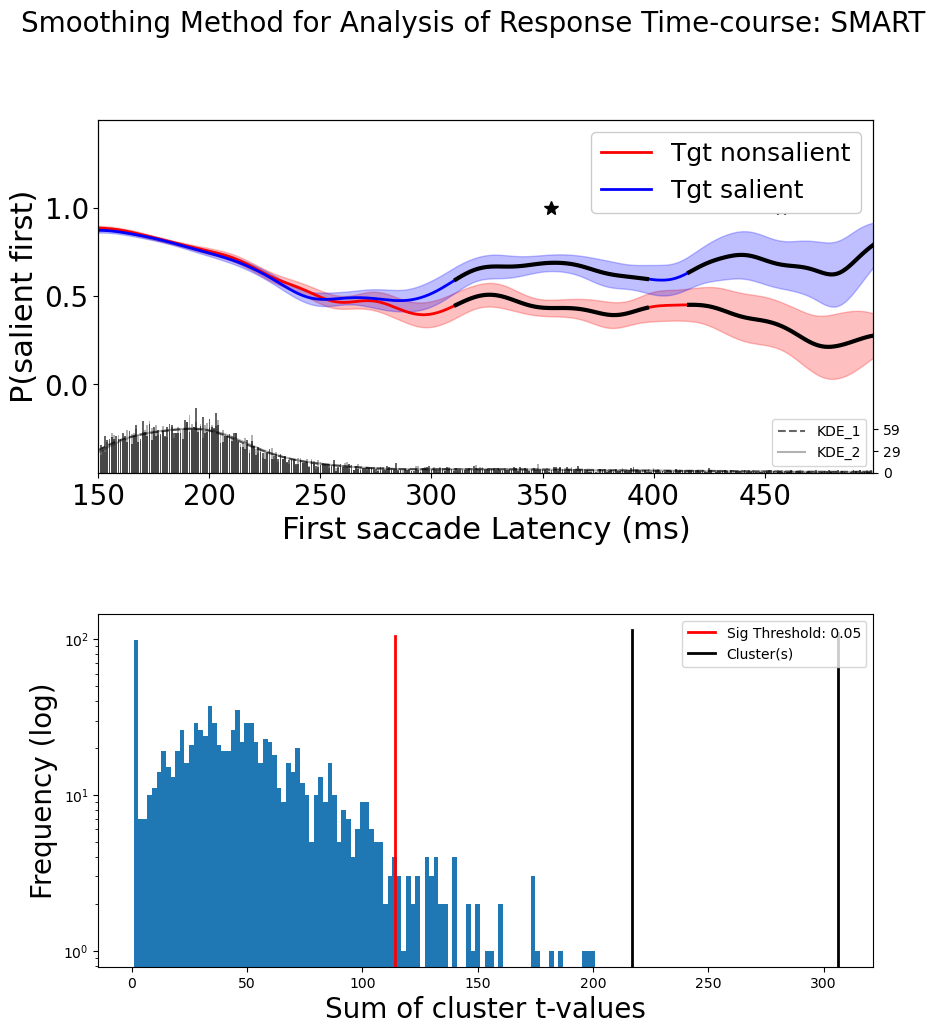

In [28]:
# ==============================================================================
# # Salience effect pre interruption (tgt_first_ns_pre vs tgt_first_s_pre)
# ==============================================================================

# Initialize and run SMART analysis
pairedSamp1 = SMART(fName, depVar1, timeVar1, depVar2, timeVar2)
pairedSamp1.runSmooth(krnSize, minTime, maxTime, stepTime)
pairedSamp1.runPermutations(nPerm)
pairedSamp1.runStats(sigLevel)
# print(pairedSamp1.smooth_dv1)

# Original plot for pairedSamp1
pairedSamp1.runPlot()
cf = plt.gcf()
cf.set_size_inches(10, 11)  # Increase figure size for clarity
pairedSamp1.ax1.legend(['Tgt nonsalient','Tgt salient'], prop={"size": 18}, loc=1, framealpha=1, fancybox=True)
pairedSamp1.ax1.set_xlabel('First saccade Latency (ms)', fontsize=22)
pairedSamp1.ax1.set_ylabel('P(salient first)', size=22)

# Adjust tick font sizes for x and y axes
pairedSamp1.ax1.tick_params(axis='x', labelsize=20)  # Adjust x-axis tick font size
pairedSamp1.ax1.tick_params(axis='y', labelsize=20)  # Adjust y-axis tick font size
# pairedSamp1.ax1.set_ylim([-0.31, 1.51])
pairedSamp1.ax1.set_yticks([0, 0.5, 1.0]) # Set y-axis ticks to 0, 0.5, 1.0

plt.subplots_adjust(hspace=0.4)

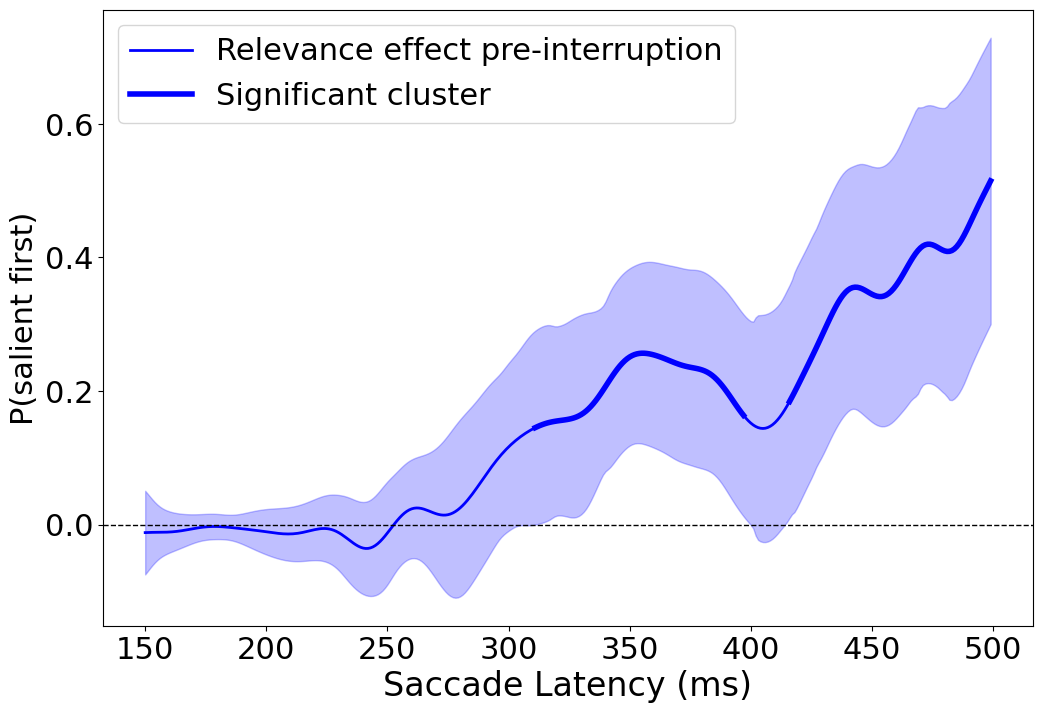

In [8]:
# ==============================================================================
# Difference Plot with Red/Blue Bold Lines for Significant Clusters
# ==============================================================================

# Calculate the difference between smoothed averages
difference = pairedSamp1.weighDv2Average - pairedSamp1.weighDv1Average

# Calculate confidence intervals for the difference
# Standard error of the mean (SEM) across participants for the difference
sem_diff = sem(pairedSamp1.smooth_dv2 - pairedSamp1.smooth_dv1, axis=0)
# 95% confidence interval: mean ± 1.96 * SEM
diff_conf95 = 1.96 * sem_diff

# Create a new figure for the difference plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the difference line
ax.plot(pairedSamp1.timeVect, difference, color='blue', linewidth=2, label='Relevance effect pre-interruption')
# Plot the difference line


# Plot the confidence intervals
ax.fill_between(pairedSamp1.timeVect, 
                difference - diff_conf95, 
                difference + diff_conf95, 
                color='blue', alpha=0.25)

# Highlight significant clusters with red or blue bold lines
for ind, cluster in enumerate(pairedSamp1.sigCL):
    # Use red if the mean difference is positive, blue if negative
    cluster_color = 'blue' 
    
    ax.plot(pairedSamp1.timeVect[cluster], difference[cluster], color=cluster_color, linewidth=4)

# Add a horizontal dashed line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust plot settings
# ax.set_xlim([125, 325])  # Extra space before 120ms and after 300ms
# ax.set_ylim([-0.2, 1.0])  # Adjust based on your data
ax.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax.set_ylabel('P(salient first)', fontsize=22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='blue', linewidth=2, label='Relevance effect pre-interruption'),
    plt.Line2D([0], [0], color='blue', linewidth=4, label='Significant cluster')
]
ax.legend(handles=custom_lines, loc='best', fontsize=22)
# Show the plot
plt.show()

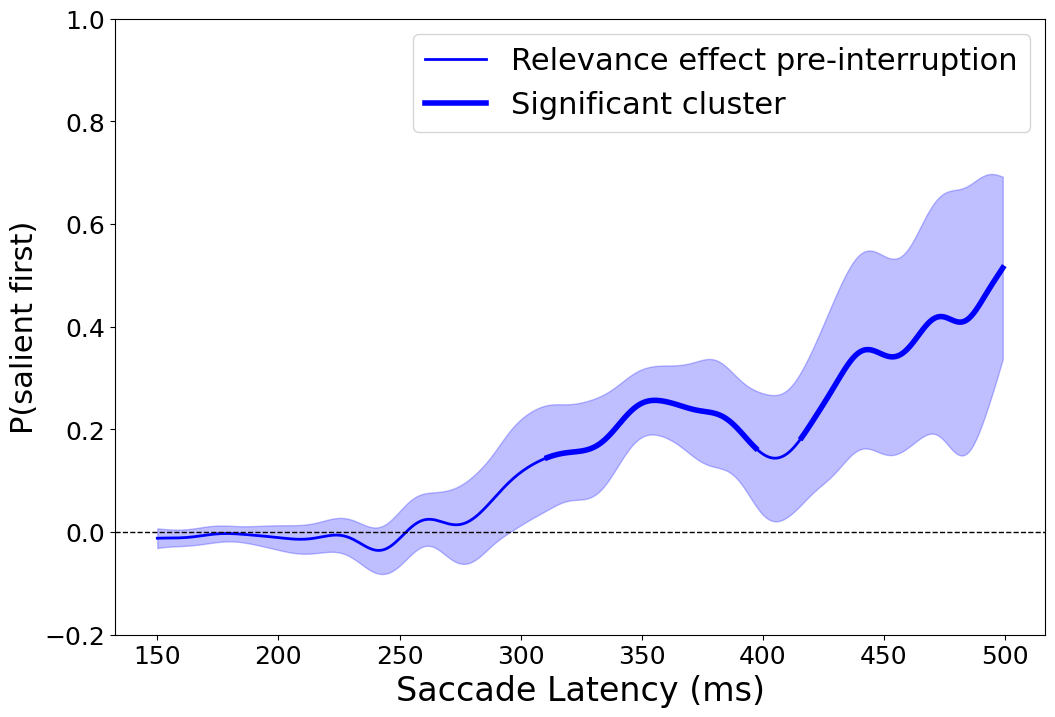

In [21]:
# TODO what's the difference between this and plot above? just calculating 95%CI instead of SEM?
# ==============================================================================
# # Difference Plot 1: Blue - Red (StoUp_close_diff vs StoUp_close_same)
# ==============================================================================

# Calculate the first difference
difference1 = pairedSamp1.weighDv2Average - pairedSamp1.weighDv1Average
conf95_diff1 = np.sqrt(pairedSamp1.conf95**2 + pairedSamp1.conf95**2)


# Create a new figure for the first difference plot
fig1, ax1 = plt.subplots(figsize=(12, 8))#figsize=(10, 6)#)

ax1.plot(
    pairedSamp1.timeVect,
    difference1,
    color='blue',
    linewidth=2,
    label='Relevance effect pre-interruption'
)

ax1.fill_between(
    pairedSamp1.timeVect,
    difference1 - conf95_diff1,
    difference1 + conf95_diff1,
    color='blue',
    alpha=0.25
)

# Highlight significant clusters with red or blue bold lines
for ind, cluster in enumerate(pairedSamp1.sigCL):
    # Use red if the mean difference is positive, blue if negative
    cluster_color = 'blue' 
    
    ax1.plot(pairedSamp1.timeVect[cluster], difference1[cluster], color=cluster_color, linewidth=4)

ax1.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax1.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax1.set_ylabel('P(salient first)', fontsize=22)
ax1.set_ylim([-0.2, 1])

# Explicitly set the x-axis limit to give some space (110 to 310ms)
# ax1.set_xlim([125, 325])  # Extra space before 120ms and after 300ms

# Define the ticks at 20ms intervals between 120ms and 300ms
# ticks_avg = list(range(125, 326, 25))  # Generates ticks at 120, 140, 160, ..., 300
# ax1.set_xticks(ticks_avg)
ax1.tick_params(axis='x', labelsize=18)  # X-axis tick labels font size
ax1.tick_params(axis='y', labelsize=18)  # Y-axis tick labels font size
custom_lines = [
    plt.Line2D([0], [0], color='blue', linewidth=2, label='Relevance effect pre-interruption'),
    plt.Line2D([0], [0], color='blue', linewidth=4, label='Significant cluster')
]
ax1.legend(handles=custom_lines, loc='best', fontsize=22) #adjust the label
#ax1.set_title('Central Selection Bias (Difference 1: Top-close vs Close-same)')

plt.show()

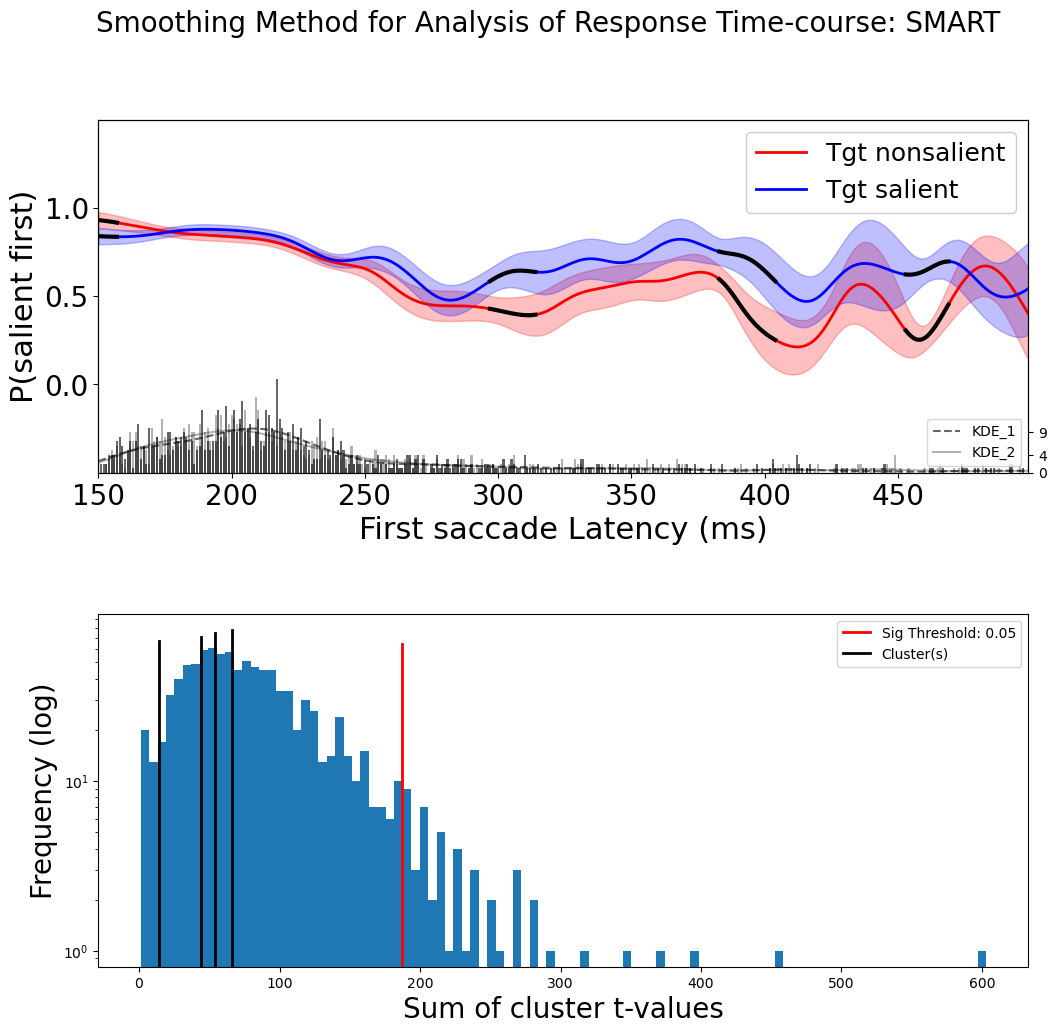

In [26]:
# ==============================================================================
# # Salience effect post interruption (tgt_first_ns_post vs tgt_first_s_post) - Blue - Red
# ==============================================================================

# Initialize and run SMART analysis
pairedSamp2 = SMART(fName, depVar3, timeVar3, depVar4, timeVar4)
pairedSamp2.runSmooth(krnSize, minTime, maxTime, stepTime)
pairedSamp2.runPermutations(nPerm)
pairedSamp2.runStats(sigLevel)

# Original plot for pairedSamp2
pairedSamp2.runPlot()
cf = plt.gcf()
cf.set_size_inches(12, 11)  # Increase figure size for clarity
pairedSamp2.ax1.legend(['Tgt nonsalient','Tgt salient'], prop={"size": 18}, loc=1, framealpha=1, fancybox=True)
pairedSamp2.ax1.set_xlabel('First saccade Latency (ms)', fontsize=22)
pairedSamp2.ax1.set_ylabel('P(salient first)', size=22)

# Adjust tick font sizes for x and y axes
pairedSamp2.ax1.tick_params(axis='x', labelsize=20)  # Adjust x-axis tick font size
pairedSamp2.ax1.tick_params(axis='y', labelsize=20)  # Adjust y-axis tick font size
# pairedSamp2.ax1.set_ylim([-0.31, 1.51])
pairedSamp2.ax1.set_yticks([0, 0.5, 1.0]) # Set y-axis ticks to 0, 0.5, 1.0

plt.subplots_adjust(hspace=0.4)

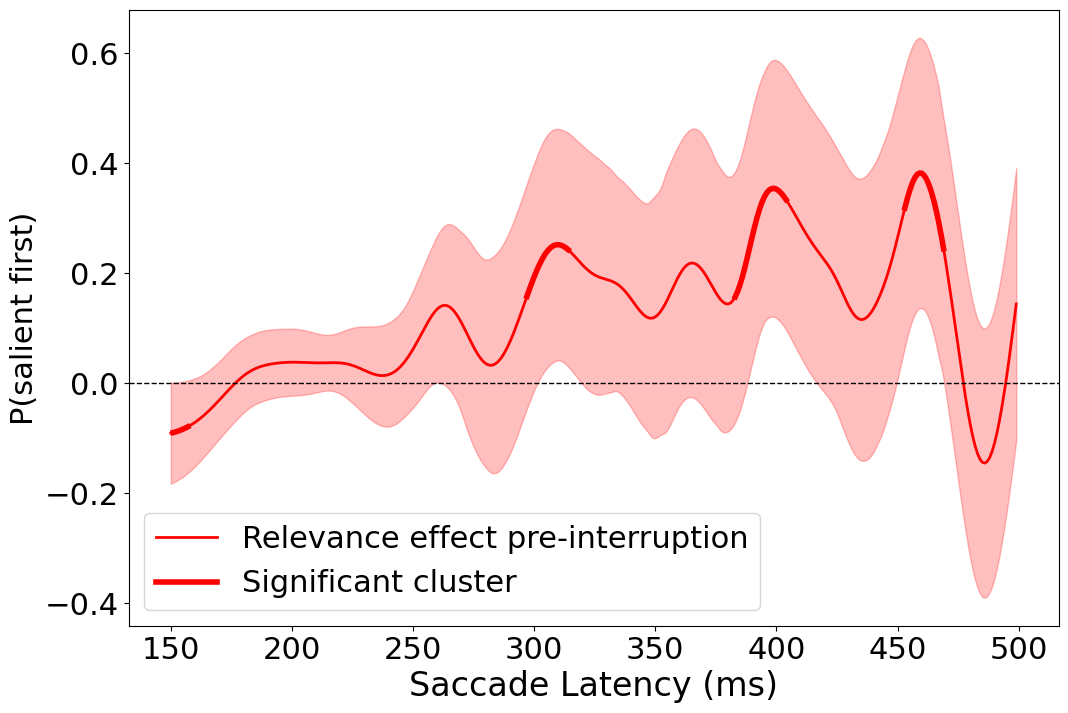

In [23]:
# ==============================================================================
# Difference Plot 2: Red - Red (tgt_first_ns_post vs tgt_first_s_post)
# ==============================================================================

# Calculate the second difference
difference2 = pairedSamp2.weighDv2Average - pairedSamp2.weighDv1Average # TODO i switched the order of subtraction so that curve would be positive, is that ok?

# Calculate confidence intervals for the difference
sem_diff2 = sem(pairedSamp2.smooth_dv2 - pairedSamp2.smooth_dv1, axis=0)  # SEM for the difference TODO same switching of order here as above!
conf95_diff2 = 1.96 * sem_diff2  # 95% confidence interval

# Create a new figure for the second difference plot
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Plot the difference line
ax2.plot(
    pairedSamp2.timeVect,
    difference2,
    color='red',
    linewidth=2,
    label='Relevance effect pre-interruption')

# Plot the confidence intervals
ax2.fill_between(
    pairedSamp2.timeVect,
    difference2 - conf95_diff2,
    difference2 + conf95_diff2,
    color='red',
    alpha=0.25
)

# Highlight significant clusters with bold red lines
for ind, cluster in enumerate(pairedSamp2.sigCL):
    cluster_color = 'red'
    ax2.plot(pairedSamp2.timeVect[cluster], difference2[cluster], color=cluster_color, linewidth=4)

# Add a horizontal dashed line at y=0
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust plot settings
# ax2.set_xlim([125, 325])  # Set x-axis limits for consistency
# ax2.set_ylim([-0.2, 1.0])  # Adjust based on your data
ax2.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax2.set_ylabel('P(salient first)', fontsize=22)
ax2.tick_params(axis='x', labelsize=22)
ax2.tick_params(axis='y', labelsize=22)

# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='red', linewidth=2, label='Relevance effect pre-interruption'),
    plt.Line2D([0], [0], color='red', linewidth=4, label='Significant cluster')
]
ax2.legend(handles=custom_lines, loc='best', fontsize=22)

# Show the plot
plt.show()

In [16]:
# TODO i don't know what this is - no edits so far
# Identify significant clusters
significant_indices2 = np.where((difference2 - conf95_diff2) > 0)[0]
if significant_indices2.size > 0:
    significant_clusters2 = np.split(significant_indices2, np.where(np.diff(significant_indices2) != 1)[0] + 1)
    for cluster in significant_clusters2:
        start_time = pairedSamp2.timeVect[cluster[0]]
        end_time = pairedSamp2.timeVect[cluster[-1]]
        print(f"Significant cluster from {start_time} to {end_time} ms for difference2")
else:
    print("No significant clusters found for Upper Bias")


# Highlight significant clusters and print details
print("Significant Clusters Information for Difference Plot 2:")
for ind, cluster in enumerate(pairedSamp2.sigCL):
    cluster_time = pairedSamp2.timeVect[cluster]  # Time range for the current cluster
    t_value = pairedSamp2.sumTvals[ind]  # Sum of t-values for the cluster
    is_significant = t_value >= pairedSamp2.sigThres  # Check if the cluster is significant
    cluster_diff = difference2[cluster]  # Difference values for the cluster

    print(f"Cluster {ind + 1}:")
    print(f"  Time Range: {cluster_time[0]}ms to {cluster_time[-1]}ms")
    print(f"  Sum of T-Values: {t_value}")
    print(f"  Significant: {'Yes' if is_significant else 'No'}, Threshold: {pairedSamp2.sigThres}")
    print(f"  Difference Values: {cluster_diff}")

Significant cluster from 125.0 to 263.0 ms for difference2
Significant cluster from 329.0 to 390.0 ms for difference2
Significant cluster from 432.0 to 443.0 ms for difference2
Significant cluster from 472.0 to 484.0 ms for difference2
Significant Clusters Information for Difference Plot 2:
Cluster 1:
  Time Range: 125.0ms to 262.0ms
  Sum of T-Values: 1375.5043330067451
  Significant: Yes, Threshold: 197.6105170831539
  Difference Values: [0.43924655 0.47133424 0.50249858 0.53250136 0.56113256 0.5882095
 0.61357782 0.63711326 0.65872317 0.6783475  0.69595886 0.71156162
 0.72519005 0.73690564 0.74679361 0.75495903 0.76152255 0.76661607
 0.77037855 0.77295201 0.77447806 0.77509481 0.77493447 0.77412141
 0.77277088 0.77098815 0.76886814 0.76649543 0.76394454 0.76128043
 0.7585592  0.75582882 0.75312995 0.75049674 0.74795762 0.74553598
 0.74325085 0.74111743 0.73914753 0.73734992 0.73573054 0.7342927
 0.73303707 0.73196175 0.7310622  0.73033118 0.72975877 0.72933238
 0.72903688 0.72885482

In [7]:
# ==============================================================================
# Average of the Two Difference Plots
# ==============================================================================

# Calculate the average of the two difference plots
average_difference = (difference + difference2) / 2

# Calculate pooled SEM and confidence intervals for the average
pooled_sem = np.sqrt(sem(pairedSamp1.smooth_dv2 - pairedSamp1.smooth_dv1, axis=0)**2 +
                     sem(pairedSamp2.smooth_dv2 - pairedSamp2.smooth_dv1, axis=0)**2) / 2 # TODO again inverted order of subtraction
average_conf95 = 1.96 * pooled_sem

# Identify areas where the average difference is significantly greater than 0
significant_indices = np.where((average_difference - average_conf95) > 0)[0]
if len(significant_indices) > 0:
    significant_start = pairedSamp1.timeVect[significant_indices[0]]
    significant_end = pairedSamp1.timeVect[significant_indices[-1]]
    # Calculate t-cluster as the sum of t-values
    t_cluster = np.sum((average_difference / pooled_sem)[significant_indices])
    # Calculate effect size (d-cluster)
    d_cluster = t_cluster / np.sqrt(len(pairedSamp1.smooth_dv1))
    # Estimate p-value (using permutation distribution, for example)
    # Assuming pairedSamp1.permDistr contains permutation distribution of t-cluster
    p_value = np.mean(pairedSamp1.permDistr >= t_cluster)
    # Print the significant time window and statistics
    print(f"Significant time window: {significant_start:.0f} ms to {significant_end:.0f} ms")
    print(f"p-value: {p_value:.3f}")
    print(f"t-cluster: {t_cluster:.2f}")
    print(f"d-cluster: {d_cluster:.2f}")
else:
    print("No significant time window found.")

Significant time window: 90 ms to 443 ms
p-value: 0.002
t-cluster: 2374.59
d-cluster: 407.24


Significant cluster from 179.0 to 266.0 ms
Significant cluster from 350.0 to 391.0 ms
Significant cluster from 467.0 to 490.0 ms


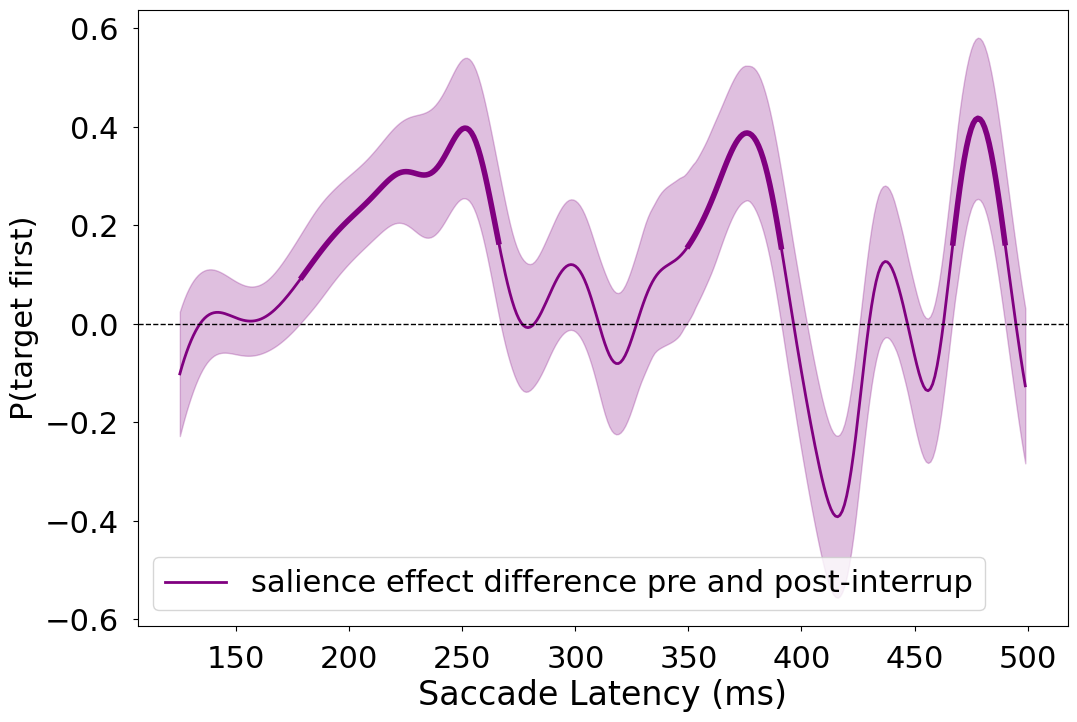

In [17]:
# ==============================================================================
# Averaged Difference Plot with Red/Blue Bold Lines for Significant Clusters
# ==============================================================================

# Compute the averaged difference
# average_difference = (difference1 + difference2) / 2
average_difference = difference2 - difference1
conf95_avg_diff = np.sqrt((conf95_diff1**2 + conf95_diff2**2) / 2)

# Identify significant time windows
significant_indices = np.where((average_difference - conf95_avg_diff) > 0)[0]
significant_clusters = []
if significant_indices.size > 0:
    significant_clusters = np.split(significant_indices, np.where(np.diff(significant_indices) != 1)[0] + 1)
    for cluster in significant_clusters:
        start_time = pairedSamp1.timeVect[cluster[0]]
        end_time = pairedSamp1.timeVect[cluster[-1]]
        print(f"Significant cluster from {start_time:.1f} to {end_time:.1f} ms")
else:
    print("No significant clusters found")

# Clip the data to the desired x-axis range (120 to 300 ms)
valid_indices_avg = (pairedSamp1.timeVect >= 80) & (pairedSamp1.timeVect <= 500) # TODO maybe i don't need this clipping?
timeVect_avg_clipped = pairedSamp1.timeVect[valid_indices_avg]
average_difference_clipped = average_difference[valid_indices_avg]
conf95_avg_diff_clipped = conf95_avg_diff[valid_indices_avg]

# Create a new figure for the averaged difference plot
fig3, ax3 = plt.subplots(figsize=(12, 8))

# Plot the averaged difference line (with clipped data)
ax3.plot(timeVect_avg_clipped, average_difference_clipped, color='purple', linewidth=2, label='Overall central selection bias')

# Plot the confidence intervals for the averaged difference (with clipped data)
ax3.fill_between(
    timeVect_avg_clipped,
    average_difference_clipped - conf95_avg_diff_clipped,
    average_difference_clipped + conf95_avg_diff_clipped,
    color='purple',
    alpha=0.25
)

# Highlight significant clusters with red or blue bold lines
for cluster in significant_clusters:
    # Determine the color based on the mean difference in the cluster
    cluster_color = 'purple'
    start_time = pairedSamp1.timeVect[cluster[0]]
    end_time = pairedSamp1.timeVect[cluster[-1]]
    cluster_indices = (pairedSamp1.timeVect >= start_time) & (pairedSamp1.timeVect <= end_time)
    ax3.plot(
        pairedSamp1.timeVect[cluster_indices],
        average_difference[cluster_indices],
        color=cluster_color,
        linewidth=4
    )

# Add a horizontal line at y=0
ax3.axhline(y=0, color='k', linestyle='--', linewidth=1)

# Add labels
ax3.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax3.set_ylabel('P(target first)', fontsize=22)
# ax3.set_ylim([-0.2, 1])

# Explicitly set the x-axis limit to give some space (110 to 310ms)
# ax3.set_xlim([125, 325])  # Extra space before 120ms and after 300ms

# Define the ticks at 20ms intervals between 120ms and 300ms
# ticks_avg = list(range(125, 326, 25))  # Generates ticks at 120, 140, 160, ..., 300
# ax3.set_xticks(ticks_avg)
ax3.tick_params(axis='x', labelsize=22, pad=10)  # X-axis tick labels font size
ax3.tick_params(axis='y', labelsize=22, pad=10)  # Y-axis tick labels font size

# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='purple', linewidth=2, label='salience effect difference pre and post-interrup'),
    #plt.Line2D([0], [0], color='purple', linewidth=4, label='Significant cluster')
]
ax3.legend(handles=custom_lines, loc='best', fontsize=22)

# Show the plot
plt.show()

In [13]:
####### identify the precentage of the trials in specific time window #######
def calculate_proportion_within_window_per_participant(data, timeVar, minTime, maxTime, condition_name):
    # Extract the column of time data
    time_data = data[timeVar]
    
    # Initialize variables
    total_trials = 0
    total_within_window = 0
    participant_proportions = []
    
    # Loop through each participant
    for participant_times in time_data:
        participant_times = np.array(participant_times)  # Ensure data is a numpy array
        within_window = (participant_times >= minTime) & (participant_times <= maxTime)
        
        # Count trials for this participant
        num_trials = len(participant_times)
        num_within_window = np.sum(within_window)
        
        # Update totals
        total_trials += num_trials
        total_within_window += num_within_window
        
        # Record proportion for this participant
        if num_trials > 0:
            participant_proportions.append(num_within_window / num_trials)
    
    # Calculate overall and average proportions
    overall_proportion = total_within_window / total_trials if total_trials > 0 else 0
    avg_participant_proportion = np.mean(participant_proportions) if participant_proportions else 0
    
    # Print results
    print(f"Condition: {condition_name}")
    print(f"Total trials across all participants: {total_trials}")
    print(f"Trials within [{minTime}, {maxTime}] ms: {total_within_window}")
    print(f"Overall proportion of trials within window: {overall_proportion:.2%}")
    print(f"Average proportion per participant: {avg_participant_proportion:.2%}")
    print("-" * 40)
    return overall_proportion, avg_participant_proportion

data = pd.read_pickle(fName)  # Load the pickle file into a DataFrame
overall_prop1, avg_participant_prop1 = calculate_proportion_within_window_per_participant(data, timeVar1, minTime, maxTime, depVar1)
overall_prop2, avg_participant_prop2 = calculate_proportion_within_window_per_participant(data, timeVar2, minTime, maxTime, depVar2)


Condition: tgt_first_ns_pre
Total trials across all participants: 5183
Trials within [80, 500] ms: 5057
Overall proportion of trials within window: 97.57%
Average proportion per participant: 97.52%
----------------------------------------
Condition: tgt_first_s_pre
Total trials across all participants: 5123
Trials within [80, 500] ms: 5005
Overall proportion of trials within window: 97.70%
Average proportion per participant: 97.72%
----------------------------------------


In [41]:
############ identify the time window contain 98%of the trials #######

def identify_middle_98(data, timeVar):
    """
    Identifies the middle 98% of trials based on saccade latency.
    Args:
        data (pd.DataFrame): DataFrame containing the saccade latencies.
        timeVar (str): Column name for the saccade latency data (lists or arrays).
    Returns:
        (float, float): The 2nd and 98th percentiles of the saccade latencies.
    """
    # Flatten the list of saccade latencies across all participants
    all_times = np.concatenate(data[timeVar].values)
    
    # Compute the 2nd and 98th percentiles
    lower_bound = np.percentile(all_times, 2)
    upper_bound = np.percentile(all_times, 95)
    
    print(f"The middle 95% of trials fall between {lower_bound:.2f} ms and {upper_bound:.2f} ms.")
    return lower_bound, upper_bound

# Example usage
timeVar1 = 'sacc_lat_ns_pre'  # Replace with your column name
lower, upper = identify_middle_98(data, timeVar1)

The middle 95% of trials fall between 144.00 ms and 413.00 ms.


In [ ]:
# Identify significant clusters and print formatted results
def print_significant_clusters(paired_sample, difference, conf95_diff, time_vect, sig_level=0.001, df=19):
    significant_indices = np.where((difference - conf95_diff) > 0)[0]
    if significant_indices.size > 0:
        # Identify clusters
        significant_clusters = np.split(significant_indices, np.where(np.diff(significant_indices) != 1)[0] + 1)
        for cluster in significant_clusters:
            start_time = time_vect[cluster[0]]
            end_time = time_vect[cluster[-1]]
            
            # Calculate cluster-level statistics
            cluster_diff = difference[cluster]
            tcluster = np.sum(cluster_diff)  # Sum of t-values
            dcluster = tcluster / np.sqrt(df + 1)  # Estimate of cluster-level effect size
            
            # Print in the required format
            print(f"{start_time:.0f}-{end_time:.0f} ms, p < {sig_level:.3f}, tcluster ({df}) = {tcluster:.2f}, dcluster = {dcluster:.2f}")
    else:
        print("No significant clusters found.")

# Example usage for difference1
print_significant_clusters(
    paired_sample=pairedSamp1,
    difference=difference1,
    conf95_diff=conf95_diff1,
    time_vect=pairedSamp1.timeVect,
    sig_level=0.01,  # significance level
    df=23  # degrees of freedom
)

# Example usage for difference2
print_significant_clusters(
    paired_sample=pairedSamp2,
    difference=difference2,
    conf95_diff=conf95_diff2,
    time_vect=pairedSamp2.timeVect,
    sig_level=0.01,  # significance level
    df=23  # degrees of freedom
)


120-237 ms, p < 0.010, tcluster (23) = 62.38, dcluster = 12.73
313-370 ms, p < 0.010, tcluster (23) = 8.26, dcluster = 1.69
419-440 ms, p < 0.010, tcluster (23) = 3.10, dcluster = 0.63
120-262 ms, p < 0.010, tcluster (23) = 84.97, dcluster = 17.34
349-391 ms, p < 0.010, tcluster (23) = 15.06, dcluster = 3.07
430-443 ms, p < 0.010, tcluster (23) = 3.35, dcluster = 0.68
475-486 ms, p < 0.010, tcluster (23) = 2.70, dcluster = 0.55


Significant cluster from 197.0 to 219.0 ms
Significant cluster from 255.0 to 265.0 ms
Significant cluster from 397.0 to 404.0 ms


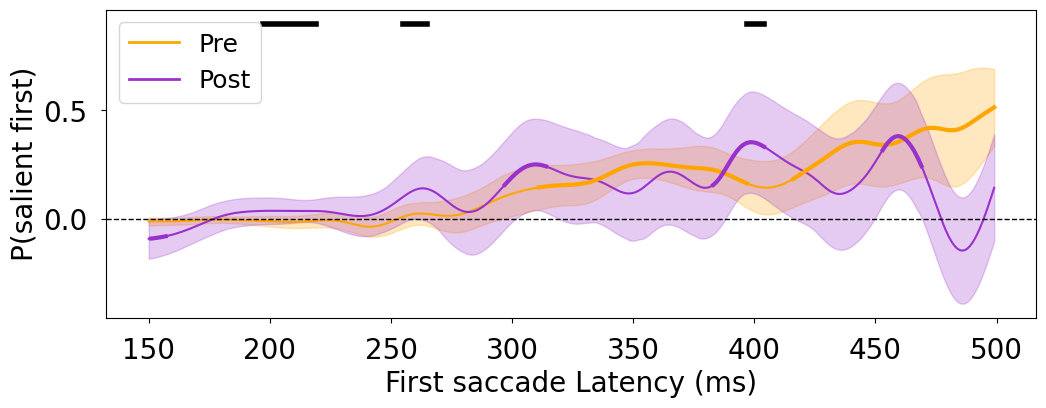

In [29]:
# Create a new figure for the combined plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the first difference (Blue line for TC conditions)
ax.plot(
    pairedSamp1.timeVect,
    difference1,
    color='orange',
    linewidth=1.5,
    label='Central selection bias in TC conditions'
)

# Plot the first confidence interval (Blue shaded area)
ax.fill_between(
    pairedSamp1.timeVect, 
    difference1 - conf95_diff1, 
    difference1 + conf95_diff1, 
    color='orange', 
    alpha=0.25
)

# Plot the second difference (Red line for TF conditions)
ax.plot(
    pairedSamp2.timeVect,
    difference2,
    color='darkorchid',
    linewidth=1.5,
    label='Central selection bias in TF conditions'
)

# Plot the second confidence interval (Red shaded area)
ax.fill_between(
    pairedSamp2.timeVect, 
    difference2 - conf95_diff2, 
    difference2 + conf95_diff2, 
    color='darkorchid', 
    alpha=0.25
)

# Highlight significant clusters for `difference1` (Blue bold lines)
for ind, cluster in enumerate(pairedSamp1.sigCL):
    ax.plot(pairedSamp1.timeVect[cluster], difference1[cluster], color='orange', linewidth=3)

# Highlight significant clusters for `difference2` (Red bold lines)
for ind, cluster in enumerate(pairedSamp2.sigCL):
    ax.plot(pairedSamp2.timeVect[cluster], difference2[cluster], color='darkorchid', linewidth=3)

# Add a horizontal dashed line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust plot settings
# ax.set_xlim([125, 325])  # Extra space before 120ms and after 300ms
# ax.set_ylim([-0.2, 1.0])  # Adjust based on your data
ax.set_xlabel('First saccade Latency (ms)', fontsize=20)
ax.set_ylabel('P(salient first)', fontsize=20)
ax.tick_params(axis='x', labelsize=20, pad=10)
ax.tick_params(axis='y', labelsize=20, pad=10)

# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='orange', linewidth=2, label='Pre'),
    plt.Line2D([0], [0], color='darkorchid', linewidth=2, label='Post'),
]
ax.legend(handles=custom_lines, loc='best', fontsize=18)



# try adding lines for significant difference between lines
average_difference = difference2 - difference1
conf95_avg_diff = np.sqrt((conf95_diff1**2 + conf95_diff2**2) / 2)

# Identify significant time windows
significant_indices = np.where((average_difference - conf95_avg_diff) > 0)[0]
significant_clusters = []
if significant_indices.size > 0:
    significant_clusters = np.split(significant_indices, np.where(np.diff(significant_indices) != 1)[0] + 1)
    for cluster in significant_clusters:
        start_time = pairedSamp1.timeVect[cluster[0]]
        end_time = pairedSamp1.timeVect[cluster[-1]]
        print(f"Significant cluster from {start_time:.1f} to {end_time:.1f} ms")
else:
    print("No significant clusters found")

# Highlight significant clusters with red or blue bold lines
for cluster in significant_clusters:
    # Determine the color based on the mean difference in the cluster
    cluster_color = 'black'
    start_time = pairedSamp1.timeVect[cluster[0]]
    end_time = pairedSamp1.timeVect[cluster[-1]]
    middle_time = round(start_time + (end_time - start_time)/2)
    cluster_indices = (pairedSamp1.timeVect >= start_time) & (pairedSamp1.timeVect <= end_time)
    # cluster_middle = abs(pairedSamp1.timeVect - middle_time) < 0.4
    cluster_middle = pairedSamp1.timeVect == middle_time
    ax.plot(
        pairedSamp1.timeVect[cluster_indices],
        # average_difference[cluster_indices],
        [0.9] * len(average_difference[cluster_indices]),
        color=cluster_color,
        linewidth=4,
    )
    # ax.plot(
    #     pairedSamp1.timeVect[cluster_middle],
    #     # average_difference[cluster_indices],
    #     [0.95] * len(average_difference[cluster_middle]), 'k*', ms = 10,
    #     # color=cluster_color,
    #     linewidth=4
    # )

# Show the plot
plt.show()

(0.0, 45.0)

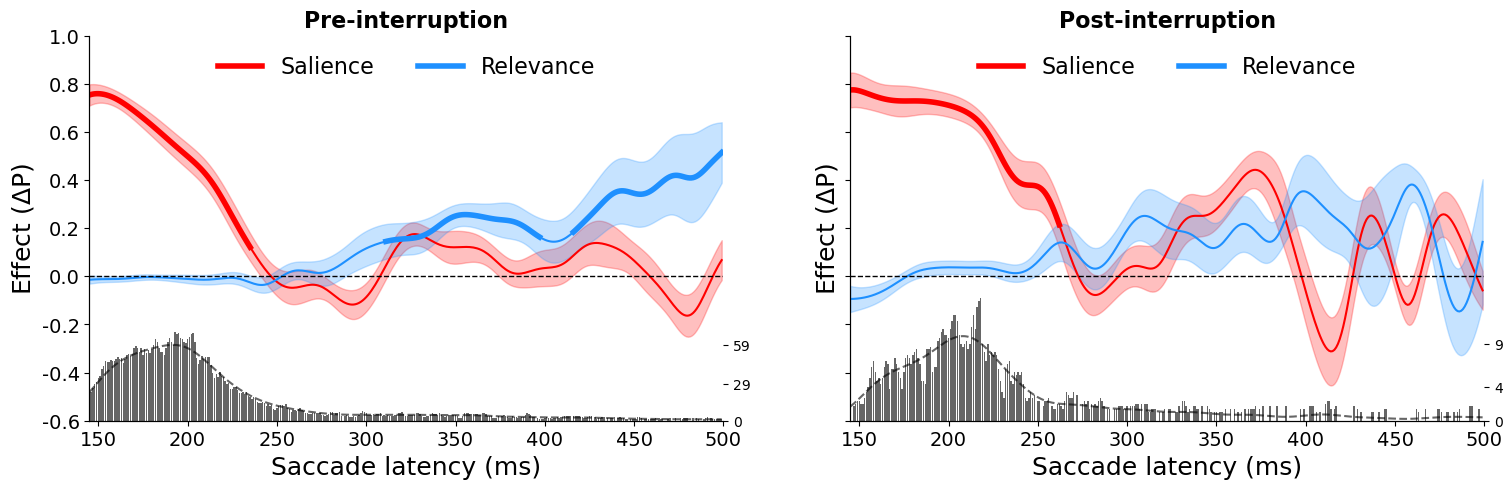

In [ ]:
##############################################################################
# run smart (no models) on sal and rel difference curves pre and post interr #
##############################################################################

import SMART_Funcs as SF

####### settings #######
# file and variables for salience
fNameSAL = 'allfilteredSAL.p'
depVar1 = 'tgt_first_ns'
timeVar1 ='sacc_lat_ns'
depVar2 = 'tgt_first_s'
timeVar2 = 'sacc_lat_s'
depVar3 = 'tgt_first_ns'
timeVar3 = 'sacc_lat_ns'
depVar4 = 'tgt_first_s'
timeVar4 = 'sacc_lat_s'

# file and variables for relevance
fNameREL = 'allfilteredREL.p'
depVar1 = 'sal_first_ns'
timeVar1 ='sacc_lat_ns'
depVar2 = 'sal_first_s'
timeVar2 = 'sacc_lat_s'
depVar3 = 'sal_first_ns'
timeVar3 = 'sacc_lat_ns'
depVar4 = 'sal_first_s'
timeVar4 = 'sacc_lat_s'

# smart settings
krnSize = 10
minTime =145
maxTime = 500
stepTime = 1
nPerm = 1000 #2000
baseline = 0.5
sigLevel = 0.05

# elle's 
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

effects = ['salience','relevance']
interruptions = ['pre', 'post']
calc_NSNT = {}
colors = ['red','dodgerblue']
title = None
legend = True

fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(18,5))

for z, interruption in enumerate(interruptions):

    for i, effect in enumerate(effects): 
        # pick the variables we need based on the effect we are calculating
        if 'salience' == effect:
            myfName = fNameSAL 
            depVar1 = 'tgt_first_ns_' + interruption
            timeVar1 ='sacc_lat_ns_' + interruption
            depVar2 = 'tgt_first_s_' + interruption
            timeVar2 = 'sacc_lat_s_' + interruption
            
        else: 
            myfName = fNameREL
            depVar1 = 'sal_first_ns_' + interruption
            timeVar1 = 'sacc_lat_ns_' + interruption
            depVar2 = 'sal_first_s_' + interruption
            timeVar2 = 'sacc_lat_s_' + interruption
        
        # run SMART
        res = SMART(myfName, depVar1, timeVar1,depVar2, timeVar2)
        res.runSmooth(krnSize, minTime, maxTime, stepTime)
        res.runPermutations(100, 0) # TODO 100 only for speed, remember to change it to nPerm
        res.runStats(sigLevel)
        
        timeVect = res.timeVect
        
        #### elle's old code: use unweighted estimates to calc difference, then weigh them yourself manually
        ## diffs_dv = res.smooth_dv2  - res.smooth_dv1
        ## sum_weights = res.weights_dv1 + res.weights_dv2
        ## these are for plotting , not used in analysis perse, but are incorporated in the t-test 
        ## weighDv1_diff = SF.weighArraysByColumn(diffs_dv, sum_weights)
        ## weighDv1Average_diff = np.nansum(weighDv1_diff, axis=0)
        # weighDv1Average_diff = np.average(diffs_dv, weights=sum_weights, axis=0) # my own updated way of weighing without SF.weighArraysByColumn 

        #### my updated code: use the already-weighted estimates to calc difference
        # weighDv1Average_diff = res.weighDv2Average - res.weighDv1Average

        # save effect and weights per subject for later model fitting (used in make_limbo_plot)
        calc_NSNT[effect + '_' + interruption] = weighDv1Average_diff = res.weighDv2Average - res.weighDv1Average
        # calc_NSNT[effect] = diffs_dv # effect_per_sub, used in make_limbo_plot
        # calc_NSNT[effect + '_weights'] = sum_weights 

        # plot this 
        ax[z].plot(timeVect, weighDv1Average_diff, color = colors[i])

        # add CI 
        ## conf95 = SF.weighConfOneSample95(diffs_dv, sum_weights) # elle's CI calculation: one sample starting from unweighted difference
        conf95 = res.conf95 # my CI calculation: two sample starting from unweighted individual lines
        ax[z].fill_between(timeVect,weighDv1Average_diff - conf95, weighDv1Average_diff + conf95, color=colors[i], alpha=0.25)
        # add where they are different from zero with a thicker line 
        for ind, j in enumerate(res.sigCL):
            if res.sumTvals[ind] >= res.sigThres:
                ax[z].plot(timeVect[res.sigCL[ind]], weighDv1Average_diff[res.sigCL[ind]], color=colors[i], linewidth =4  )
        
    ax[z].set_xlabel('Saccade latency (ms)', fontsize = 18)
    ax[z].set_ylabel('Effect (' + r'$\Delta$'+ 'P)', fontsize = 18 )

    # # get rid of the lines at the top and right 
    ax[z].spines['right'].set_visible(False)
    ax[z].spines['top'].set_visible(False)
    ax[z].axhline(0, color='black', linestyle='--', linewidth=1)

    ax[z].set_ylim(-0.6, 1.0)

    ax[z].set_title(f'{interruption.capitalize()}-interruption', fontsize = 16, weight = 'bold')

    # add custom legend 
    from matplotlib.lines import Line2D
    saliency_line = Line2D([0], [0], color=colors[0], lw=4, label = 'Salience')
    relevance_line= Line2D([0], [0], color=colors[1], lw=4, label = 'Relevance')
            
    if legend: 
        ax[z].legend(handles=[saliency_line, relevance_line], fontsize = 16, frameon =False, ncol =2, loc = 'upper center')

    # add the KDE
    ax[z].tick_params(axis='both', which='major', labelsize=14)
    ax[z].tick_params(axis='both', which='minor', labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax[z].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # Plot kernel density estimation KDE
    sTimes1, unqT1, countT1 = SF.getKDE(np.hstack(res.data[res.t1]),timeVect, res.krnSize) 
    countT1o = smooth(countT1,3)
    kde_ax = ax[z].twinx()
    kde_ax.set_ylim(0, 300)
    kde_ax.plot(timeVect, sTimes1, '--k', alpha = 0.6)
    kde_ax.bar(unqT1, countT1o, color='black', alpha = 0.6)
    kde_ax.set_xlim(minTime,maxTime)
    kde_ax.set_yticks(np.linspace(0,np.max(np.hstack([sTimes1])),3, dtype=int))
    kde_ax.spines['right'].set_visible(False)
    kde_ax.spines['top'].set_visible(False)
kde_ax.set_ylim(0, 45) # reset y axis scale for post-interr plot so that it matches scale of pre-interr one
# fig.tight_layout()

36


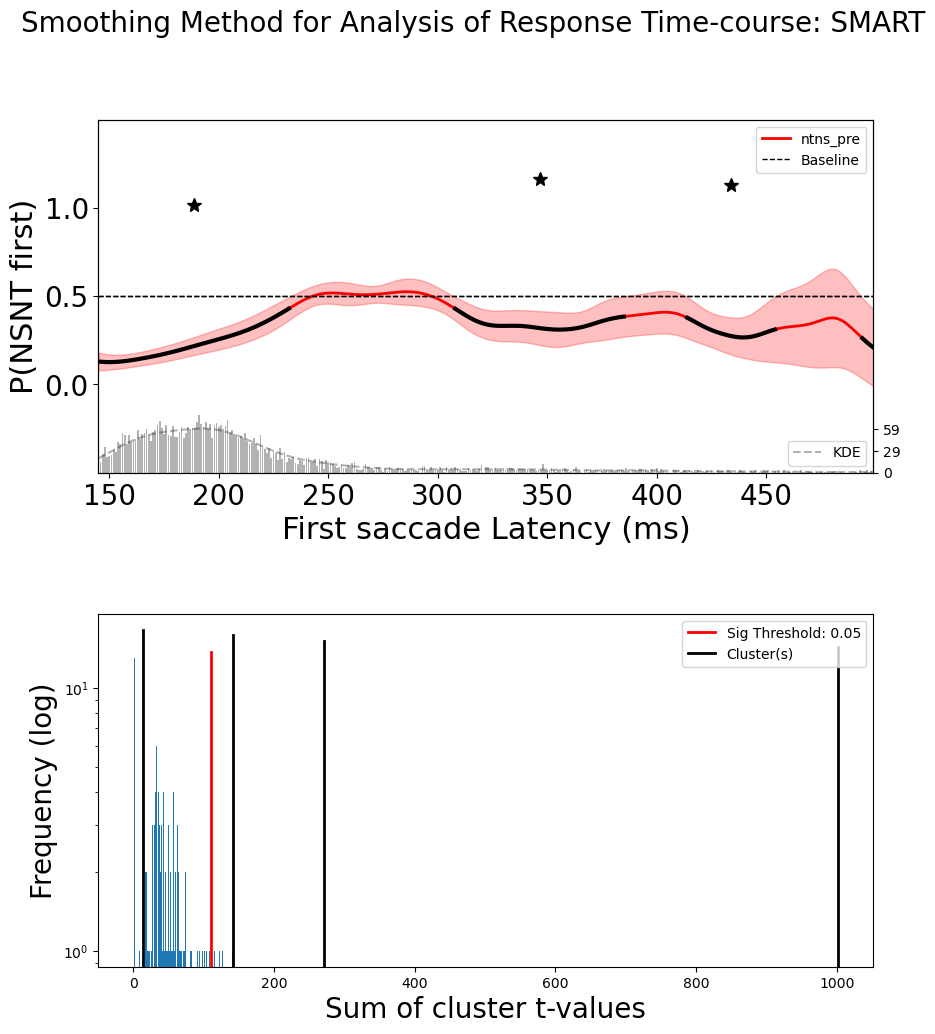

In [ ]:
# run SMART on NTNS pre and post interruption (not needed)

####### settings #######
# file and variables
fName = 'ntnsPrePost.p'
depVar1 = 'ntns_pre'
timeVar1 ='sacc_lat_ntns_pre'
depVar2 = 'ntns_post'
timeVar2 = 'sacc_lat_ntns_post'

# smart settings
krnSize = 10
minTime =145
maxTime = 500
stepTime = 1
nPerm = 1000 #2000
baseline = 0.5
sigLevel = 0.05

# Initialize and run SMART analysis
ntns_res = SMART(fName, depVar1, timeVar1)
# ntns_res = SMART(fName, depVar2, timeVar2)
# ntns_res = SMART(fName, depVar1, timeVar1, depVar2, timeVar2)
ntns_res.runSmooth(krnSize, minTime, maxTime, stepTime)
ntns_res.runPermutations(100, baseline) # test against 0.5 (chance) baseline for onesamp analyses, otherwise for twosamp test btwn conditions (baseline 0 or None should be irrelevant)
ntns_res.runStats(sigLevel)
print(ntns_res.nPP)

# Original plot for ntns_res
ntns_res.runPlot()
cf = plt.gcf()

# add dash line at chance level (0.5) to match onesamp plots
baselineX = np.arange(minTime, maxTime, 1)
baselineY = np.zeros(len(baselineX))+baseline
ntns_res.ax1.plot(baselineX, baselineY,'k', ls='--', linewidth=1)

cf.set_size_inches(10, 11)  # Increase figure size for clarity
# ntns_res.ax1.legend(['Tgt nonsalient','Tgt salient'], prop={"size": 18}, loc=1, framealpha=1, fancybox=True)
ntns_res.ax1.set_xlabel('First saccade Latency (ms)', fontsize=22)
ntns_res.ax1.set_ylabel('P(NSNT first)', size=22)

# Adjust tick font sizes for x and y axes
ntns_res.ax1.tick_params(axis='x', labelsize=20)  # Adjust x-axis tick font size
ntns_res.ax1.tick_params(axis='y', labelsize=20)  # Adjust y-axis tick font size
# ntns_res.ax1.set_ylim([-0.31, 1.51])
ntns_res.ax1.set_yticks([0, 0.5, 1.0]) # Set y-axis ticks to 0, 0.5, 1.0

plt.subplots_adjust(hspace=0.4)


In [ ]:
# Make limbo plot (adapted from Elle)

# salience_pre = calc_NSNT['salience_pre']
# salience_post = calc_NSNT['salience_post']
# relevance_pre = calc_NSNT['relevance_pre']
# relevance_post = calc_NSNT['relevance_post']

# #############################################
# ###### variables needed for plotting  #############
# calc_NSNT_line =  (1-salience_pre) * (1-relevance_pre) *0.5
# #################################################

# #################################################
# ####### variables needed for the stats  
# ############################################
# calc_NSNT_per_sub = (1-salience_effect) * (1-relevance_effect)*0.5 
# weights_per_sub = np.sum([salience_weights, relevance_weights], axis = 0)

# # see where these lines are different from eachother 
# [t_values1, p_values1] = SF.weighted_ttest_rel(calc_NSNT_per_sub,res.smooth_dv1,weights_per_sub,res.weights_dv1) #cond1, cond2, weights1, weights2

# # now do the permutation part 
# df1 = pd.DataFrame({'diffs_dv': list(calc_NSNT_per_sub), 'condition': np.ones(self.nSubs), 'sum_weights': list(weights_per_sub) })
# df2 = pd.DataFrame({'diffs_dv': list(res.smooth_dv1),'condition': 2*np.ones(self.nSubs),'sum_weights': list(res.weights_dv1)})
# df_new = pd.concat([df1,df2])
# permDistr1 = self.permute(df_new, self.nPerm)

# # determine the threshold 
# sigThres1 = np.percentile(permDistr1, 95)
# # get cluster 
# clusters, indx = SF.getCluster(p_values1 < 0.05) 
# # caculate sum of t-vals (only for those clusters where it is lower than 0.05 )
# sigCL1 = [indx[i] for i in range(len(clusters)) if clusters[i][0] == True]
# sumTvals1 = [np.sum(abs(t_values1[i])) for i in sigCL1]
# # plot where they are different (which is never)
# for ind, i in enumerate(sigCL1):
#                     if sumTvals1[ind] >= sigThres1:  #only if it is really significant 
#                             x = self.timeVect[sigCL1[ind]]
#                             y  = [0.1]* len(x)
#                             plt.plot(x,y,'orange', linewidth = 5)
#                             plt.plot(x,y,'purple',linestyle = '--', linewidth = 5, dashes = [2,2])
                            
# # get p values to report in the paper 
# from scipy.stats import percentileofscore
# obs_clusters = sumTvals1
# percentile_values = [percentileofscore(permDistr1, obs_cluster) for obs_cluster in obs_clusters]
# p_values = 1 - np.array(percentile_values)/100.
# print('Cluster p-values: ', p_values)

In [ ]:
##################### 
# FITTING FUNCTIONS #
#####################

###################
# basic functions #
###################

# S(t)
def salient(time,t0,r): # r means rate (a in the paper)
    y = np.zeros((len(time)))
    for i,t in enumerate(time): 
        if t < t0: 
            y[i] =1 
        else: 
            y[i] = np.e**(-r*(t-t0))
    return y 

# R(t)
def relevance(time,t0,r):
    y = np.zeros((len(time)))
    for i,t in enumerate(time): 
        if t < t0: 
            y[i] = 0 
        else: 
            y[i] = 1 - np.e**(-r*(t-t0))
    return y



def full_model(t,rS,rR,t0S,t0R):
    S = salient(t,t0S,rS)
    G = relevance(t,t0R,rR)
    return S, G

def dependent_model(t,rS,t0S): # t0R and rR and now the same as rS and t0S
    S = salient(t,t0S,rS)
    G = relevance(t,t0S,rS)
    return S, G

# salience only model
def salience_model(t,rS,t0S):
    S = salient(t,t0S,rS)
    return S

# relevance only model
def relevance_model(t,rR,t0R):
    G = relevance(t,t0R,rR)
    return G


#######################
# optimizer functions #
#######################

# full model 
def optim_func(var,*args): 
    y_real_s = args[0]
    y_real_r = args[1]
    ys = full_model(timeVect,var[0],var[1],var[2],var[3])[0]
    yr = full_model(timeVect,var[0],var[1],var[2],var[3])[1]
    dif_s = np.sum((y_real_s-ys)**2) # least squares method - sqrt as chris did, results are super similar to not using sqrt, but not identical
    dif_r = np.sum((y_real_r-yr)**2)
    dif = dif_s + dif_r
    return dif

def optim_func2(var,y_real_s, y_real_r, *args): # full model but with explicit args y_real_s and y_real_r  to use to calc AIC
    y_real_s = y_real_s
    y_real_r = y_real_r
    ys = full_model(timeVect,var[0],var[1],var[2],var[3])[0]
    yr = full_model(timeVect,var[0],var[1],var[2],var[3])[1]
    dif_s = np.sum((y_real_s-ys)**2) # least squares method - sqrt as chris did, results are super similar to not using sqrt, but not identical
    dif_r = np.sum((y_real_r-yr)**2)
    dif = dif_s + dif_r
    return dif

# dependent model  
def optim_func_dependent(var,*args): 
    y_real_s = args[0]
    y_real_r = args[1]
    ys = dependent_model(timeVect,var[0],var[1])[0]
    yr = dependent_model(timeVect,var[0],var[1])[1]
    dif_s = np.sum((y_real_s-ys)**2) # least squares method - sqrt as chris did, results are super similar to not using sqrt, but not identical
    dif_r = np.sum((y_real_r-yr)**2)
    dif = dif_s + dif_r
    return dif 

def optim_func_dependent2(var, y_real_s, y_real_r, *args): # dependent model but with explicit args y_real_s and y_real_r  to use to calc AIC
    y_real_s = y_real_s
    y_real_r = y_real_r
    ys = dependent_model(timeVect,var[0],var[1])[0]
    yr = dependent_model(timeVect,var[0],var[1])[1]
    dif_s = np.sum((y_real_s-ys)**2) # least squares method - sqrt as chris did, results are super similar to not using sqrt, but not identical
    dif_r = np.sum((y_real_r-yr)**2)
    dif = dif_s + dif_r
    return dif 

# salience only model
def optim_func_saliency(var,*args): 
    y_real = args[0]
    y = salience_model(timeVect,var[0],var[1])
    dif = np.sum((y_real-y)**2) # least squares method
    return dif 
    
# relevance only model
def optim_func_relevance(var,*args): 
    y_real = args[0]
    y = relevance_model(timeVect,var[0],var[1])
    dif = np.sum((y_real-y)**2) # least squares method
    return dif 


# calculate AIC
def calc_AIC(RSS, p):
    n = len(timeVect)
    AIC = 2*((n/2) *np.log(RSS/n))+(2*p)
    return AIC 


#################
# model fitting #
#################

def MLE_fit(input_data, effect, whichmodel): 
    
    if whichmodel == 'full' or whichmodel == 'dep':
        nSubs = np.shape(input_data[0])[0]
    else:
        nSubs = np.shape(input_data)[0]

    # first do a round of Least Squares to get good starting points 
    results_salience = np.zeros((nSubs, 2)) # two vars  = salience only model
    results_relevance = np.zeros((nSubs,2)) # two vars  = relevance only model 
    results_full  = np.zeros((nSubs, 4))  # four vars  = full model 
    results_dependent = np.zeros((nSubs, 2)) # two vars = dependent model 
    AICs = np.zeros((nSubs,4)) # AIC score 

    from scipy.optimize import minimize
    for n in range(nSubs): 
        # y_real = input_data[n,:]
        
        if whichmodel == 'full':
            y_real_s = input_data[0][n,:]
            y_real_r = input_data[1][n,:]

            ####################
            # full model #######
            ####################
            
            var = [0.01,0.01,120,230]
            result = minimize(optim_func, var,args = (y_real_s, y_real_r),options={'disp': False, 'maxfun':1000},method = 'TNC',bounds = [(0,None),(0,None),(0,None),(0,None)])# 0 here in args, because of leastsquares   
            results_full[n,:] = result.x
            RSS = optim_func2(result.x, y_real_s, y_real_r, 0)
            AICs[n,0] = calc_AIC(RSS,4)
        
        elif whichmodel == 'dep':
            y_real_s = input_data[0][n,:]
            y_real_r = input_data[1][n,:]

            ####################
            # dependent model ##
            ####################
            
            var = [0.01,200]#155] 
            result = minimize(optim_func_dependent, var,args = (y_real_s, y_real_r),options={'disp': False, 'maxfun':1000},method = 'TNC',bounds = [(0,None),(0,None)])# 0 here in args, because of leastsquares   
            results_dependent[n,:] = result.x
            RSS = optim_func_dependent2(result.x, y_real_s, y_real_r, 0)
            AICs[n,1] = calc_AIC(RSS,2)
        
        elif whichmodel == 'indep':
            y_real = input_data[n,:]

            if effect == 'salience':
                #####################
                # salience model ####
                #####################
                var =  [0.01,155]# 
                result = minimize(optim_func_saliency, var,args = (y_real),options={'disp': False, 'maxfun':1000},method = 'TNC',bounds = [(0,None),(0,None)])# 0 here in args, because of leastsquares
                results_salience[n,:] = result.x
                RSS = optim_func_saliency(result.x,y_real,0)
                AICs[n,2] = calc_AIC(RSS,2)
            
            elif effect == 'relevance':
                ###################
                # relevance model #
                ###################
                
                var =  [0.01,230]
                result = minimize(optim_func_relevance, var,args = (y_real),options={'disp': False, 'maxfun':1000},method = 'TNC',bounds = [(0,None),(0,None)])# 0 here in args, because of leastsquares
                results_relevance[n,:] = result.x
                RSS = optim_func_relevance(result.x,y_real,0)
                AICs[n,3] = calc_AIC(RSS,2)
    
    if whichmodel == 'full':
        return results_full, AICs
    
    elif whichmodel == 'dep':
        return results_dependent, AICs
    
    elif whichmodel == 'indep':
        if effect == 'salience':
            return results_salience, AICs
        elif effect == 'relevance':
            return results_relevance, AICs


In [85]:
empty = []
ar1 = np.atleast_2d(calc_NSNT['salience_pre'])
print(np.shape(ar1)[0])
empty.append(ar1)

ar2 = np.atleast_2d(calc_NSNT['relevance_pre'])
empty.append(ar2)
print(np.shape(empty[0])[0])
print(empty[1][0, 5])

# empty = []
# ar1 = calc_NSNT['salience_pre']
# # print(np.shape(ar1))
# empty.append(ar1)

# ar2 = np.atleast_2d(calc_NSNT['relevance_pre'])
# empty.append(ar2)
# print(np.shape(empty[1]))

1
1
-0.012018251126662771


[[  0.01777948   0.00211333 143.44408176 252.59914965]]
[[-1514.9710179     0.            0.            0.            0.       ]]
[[  0.00958577   0.00074404 138.73894712 147.78836986]]
[[-1118.39656284     0.             0.             0.
      0.        ]]


(0.0, 45.0)

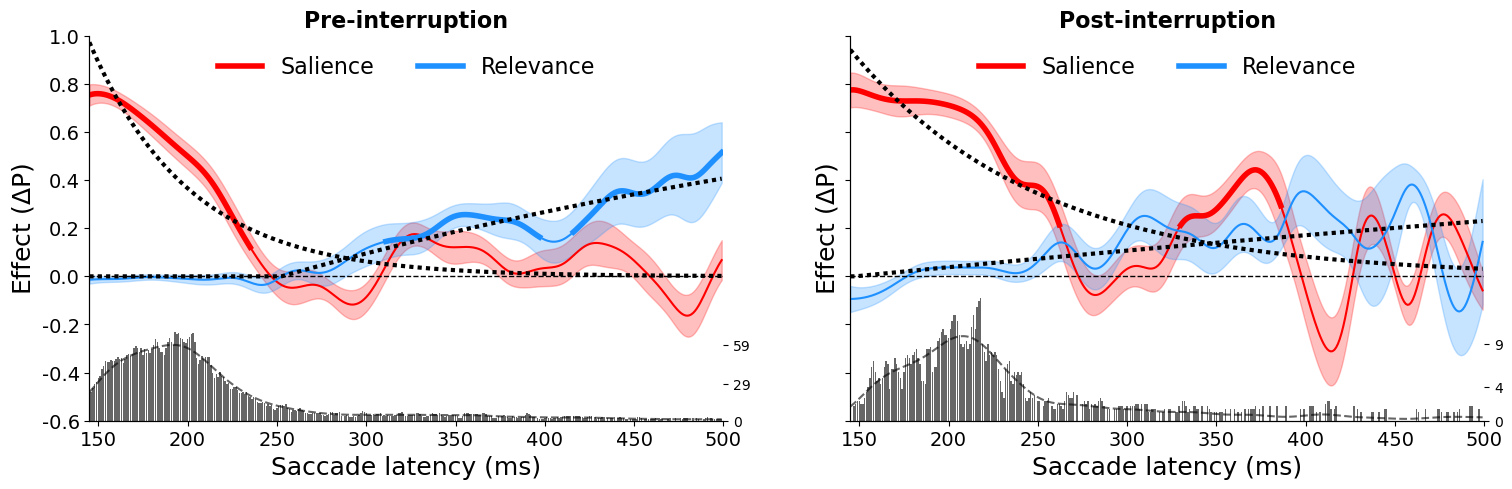

In [ ]:
import SMART_Funcs as SF

####### settings #######
# file and variables for salience
fNameSAL = 'allfilteredSAL.p'
depVar1 = 'tgt_first_ns'
timeVar1 ='sacc_lat_ns'
depVar2 = 'tgt_first_s'
timeVar2 = 'sacc_lat_s'
depVar3 = 'tgt_first_ns'
timeVar3 = 'sacc_lat_ns'
depVar4 = 'tgt_first_s'
timeVar4 = 'sacc_lat_s'

# file and variables for relevance
fNameREL = 'allfilteredREL.p'
depVar1 = 'sal_first_ns'
timeVar1 ='sacc_lat_ns'
depVar2 = 'sal_first_s'
timeVar2 = 'sacc_lat_s'
depVar3 = 'sal_first_ns'
timeVar3 = 'sacc_lat_ns'
depVar4 = 'sal_first_s'
timeVar4 = 'sacc_lat_s'

# smart settings
krnSize = 10
minTime =145
maxTime = 500
stepTime = 1
nPerm = 1000 #2000
baseline = 0.5
sigLevel = 0.05


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

effects = ['salience','relevance']
interruptions = ['pre', 'post']
calc_NSNT = {}
colors = ['red','dodgerblue']
title = None
legend = True
whichmodel = 'full' # choose which model to run: full, dep, or indep

fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(18,5))

for z, interruption in enumerate(interruptions):

    arraydata = []

    for i, effect in enumerate(effects): 
        # pick the variables we need based on the effect we are calculating
        if 'salience' == effect:
            myfName = fNameSAL 
            depVar1 = 'tgt_first_ns_' + interruption
            timeVar1 ='sacc_lat_ns_' + interruption
            depVar2 = 'tgt_first_s_' + interruption
            timeVar2 = 'sacc_lat_s_' + interruption
            
        else: 
            myfName = fNameREL
            depVar1 = 'sal_first_ns_' + interruption
            timeVar1 = 'sacc_lat_ns_' + interruption
            depVar2 = 'sal_first_s_' + interruption
            timeVar2 = 'sacc_lat_s_' + interruption
        
        # run SMART
        res = SMART(myfName, depVar1, timeVar1,depVar2, timeVar2)
        res.runSmooth(krnSize, minTime, maxTime, stepTime)
        res.runPermutations(100, 0) # TODO 100 only for speed, remember to change it to nPerm
        res.runStats(sigLevel)
        
        timeVect = res.timeVect
        
        #### elle's old code: use unweighted estimates to calc difference, then weigh them yourself manually
        ## diffs_dv = res.smooth_dv2  - res.smooth_dv1
        ## sum_weights = res.weights_dv1 + res.weights_dv2
        ## these are for plotting , not used in analysis perse, but are incorporated in the t-test 
        ## weighDv1_diff = SF.weighArraysByColumn(diffs_dv, sum_weights)
        ## weighDv1Average_diff = np.nansum(weighDv1_diff, axis=0)
        # weighDv1Average_diff = np.average(diffs_dv, weights=sum_weights, axis=0) # my own updated way of weighing without SF.weighArraysByColumn 

        #### my updated code: use the already-weighted estimates to calc difference
        # weighDv1Average_diff = res.weighDv2Average - res.weighDv1Average
        calc_NSNT[effect + '_' + interruption] = weighDv1Average_diff = res.weighDv2Average - res.weighDv1Average
        # calc_NSNT[effect] = diffs_dv # effect_per_sub, used in make_limbo_plot
        # calc_NSNT[effect + '_weights'] = sum_weights

        # plot this 
        ax[z].plot(timeVect, weighDv1Average_diff, color = colors[i])

        # add CI 
        ## conf95 = SF.weighConfOneSample95(diffs_dv, sum_weights) # elle's CI calculation: one sample starting from unweighted difference
        conf95 = res.conf95 # my CI calculation: two sample starting from unweighted individual lines
        ax[z].fill_between(timeVect,weighDv1Average_diff - conf95, weighDv1Average_diff + conf95, color=colors[i], alpha=0.25)
        # add where they are different from zero with a thicker line 
        for ind, j in enumerate(res.sigCL):
            if res.sumTvals[ind] >= res.sigThres:
                ax[z].plot(timeVect[res.sigCL[ind]], weighDv1Average_diff[res.sigCL[ind]], color=colors[i], linewidth =4  )
        
        # convert weighted difference to 2d array to later use for full/dep model fitting, which need access to both salience and relevance differences together (stored in arraydata)
        ar1 = np.atleast_2d(weighDv1Average_diff)
        arraydata.append(ar1)

        # fit salience and relevance models separately (optimise for SS of each effect individually)
        # if whichmodel == 'indep':
        #     fit_results = MLE_fit(np.atleast_2d(weighDv1Average_diff), effect, whichmodel)
        #     print(fit_results[0])
        #     if effect == 'salience':
        #         fit_line = salience_model(timeVect, fit_results[0][0][0], fit_results[0][0][1])
        #     if effect == 'relevance':
        #         fit_line = relevance_model(timeVect, fit_results[0][0][0], fit_results[0][0][1])
        #     ax[z].plot(timeVect, fit_line, color = 'black', linestyle =  (0, (1, 1)), linewidth =3, zorder=2)
    
    # fit independent model (optimise for sum of SS of salience and relevance models)
    if whichmodel == 'full':
        fit_results, fit_aics = MLE_fit(arraydata, effect, whichmodel)
        print(fit_results)
        print(fit_aics)
        fit_line_s = full_model(timeVect, fit_results[0][0], fit_results[0][1], fit_results[0][2], fit_results[0][3])[0]
        fit_line_r = full_model(timeVect, fit_results[0][0], fit_results[0][1], fit_results[0][2], fit_results[0][3])[1]
        ax[z].plot(timeVect, fit_line_s, color = 'black', linestyle = (0, (1, 1)), linewidth = 3, zorder = 2)
        ax[z].plot(timeVect, fit_line_r, color = 'black', linestyle = (0, (1, 1)), linewidth = 3, zorder = 2)
    
    # fit dependent model (optimise for sum of SS of salience and relevance models)
    elif whichmodel == 'dep':
        fit_results, fit_aics = MLE_fit(arraydata, effect, whichmodel)
        print(fit_results[0])
        print(fit_aics)
        fit_line_s = dependent_model(timeVect, fit_results[0][0], fit_results[0][1])[0]
        fit_line_r = dependent_model(timeVect, fit_results[0][0], fit_results[0][1])[1]
        ax[z].plot(timeVect, fit_line_s, color = 'black', linestyle = (0, (1, 1)), linewidth = 3, zorder =2 )
        ax[z].plot(timeVect, fit_line_r, color = 'black', linestyle = (0, (1, 1)), linewidth = 3, zorder = 2)


    ax[z].set_xlabel('Saccade latency (ms)', fontsize = 18)
    ax[z].set_ylabel('Effect (' + r'$\Delta$'+ 'P)', fontsize = 18 )

    # # get rid of the lines at the top and right 
    ax[z].spines['right'].set_visible(False)
    ax[z].spines['top'].set_visible(False)
    ax[z].axhline(0, color='black', linestyle='--', linewidth=1)

    ax[z].set_ylim(-0.6, 1.0)

    ax[z].set_title(f'{interruption.capitalize()}-interruption', fontsize = 16, weight = 'bold')

    # add custom legend 
    from matplotlib.lines import Line2D
    saliency_line = Line2D([0], [0], color=colors[0], lw=4, label = 'Salience')
    relevance_line = Line2D([0], [0], color=colors[1], lw=4, label = 'Relevance')
            
    if legend: 
        ax[z].legend(handles=[saliency_line, relevance_line], fontsize = 16, frameon =False, ncol =2, loc = 'upper center')

    # add the KDE
    ax[z].tick_params(axis='both', which='major', labelsize=14)
    ax[z].tick_params(axis='both', which='minor', labelsize=12)
    from matplotlib.ticker import FormatStrFormatter
    ax[z].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # Plot kernel density estimation KDE
    sTimes1, unqT1, countT1 = SF.getKDE(np.hstack(res.data[res.t1]),timeVect, res.krnSize) 
    countT1o = smooth(countT1,3)
    kde_ax = ax[z].twinx()
    kde_ax.set_ylim(0, 300)
    kde_ax.plot(timeVect, sTimes1, '--k', alpha = 0.6)
    kde_ax.bar(unqT1, countT1o, color='black', alpha = 0.6)
    kde_ax.set_xlim(minTime,maxTime)
    kde_ax.set_yticks(np.linspace(0,np.max(np.hstack([sTimes1])),3, dtype=int))
    kde_ax.spines['right'].set_visible(False)
    kde_ax.spines['top'].set_visible(False)
kde_ax.set_ylim(0, 45) # reset y axis scale for post-interr plot so that it matches scale of pre-interr one
# fig.tight_layout()